# Appendix: Hierarchical Clustering Algorithms

" In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build **a hierarchy of clusters** ... **Agglomerative** is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy ... The results of hierarchical clustering are usually presented in a **dendrogram** (a tree-like diagram)"

Let's support the original data looks like this
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Clusters.svg">

The above data is organized in a **dendrogram**
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ad/Hierarchical_clustering_simple_diagram.svg">

https://en.wikipedia.org/wiki/Hierarchical_clustering

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [3]:
df = pd.read_csv('data/Chapter06Dataset.csv')
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
Weight         547 non-null int64
Cholesterol    547 non-null int64
Gender         547 non-null int64
dtypes: int64(3)
memory usage: 12.9 KB


Normalizing the data

In [5]:
#http://stackoverflow.com/questions/12525722/normalize-data-in-pandas

X = (df - df.mean()) / (df.max() - df.min())
X.head()

,Weight,Cholesterol,Gender
0,-0.384928,-0.446867,0.486289
1,-0.264558,-0.266416,0.486289
2,-0.264558,-0.258897,0.486289
3,-0.033076,-0.025814,-0.513711
4,-0.125669,-0.093483,0.486289


## AgglomerativeClustering

Recursively merges the pair of clusters that minimally increases a given linkage distance

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [6]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([2, 2, 2, 0, 2, 1, 2, 0, 3, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 3, 0, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 0, 1, 1, 1, 2, 3, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 3,
       0, 2, 0, 2, 0, 3, 2, 0, 3, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 3,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 3,
       2, 2, 2, 0, 2, 1, 2, 0, 3, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 3, 0, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 0, 1, 1, 1, 2, 3, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 3,
       0, 2, 0, 2, 0, 3, 2, 0, 3, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 3,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 3,
       2, 2, 2, 0, 2, 1, 2, 0, 3, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 3, 0, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 0, 1, 1, 1, 2, 3, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 3,
       0, 2,

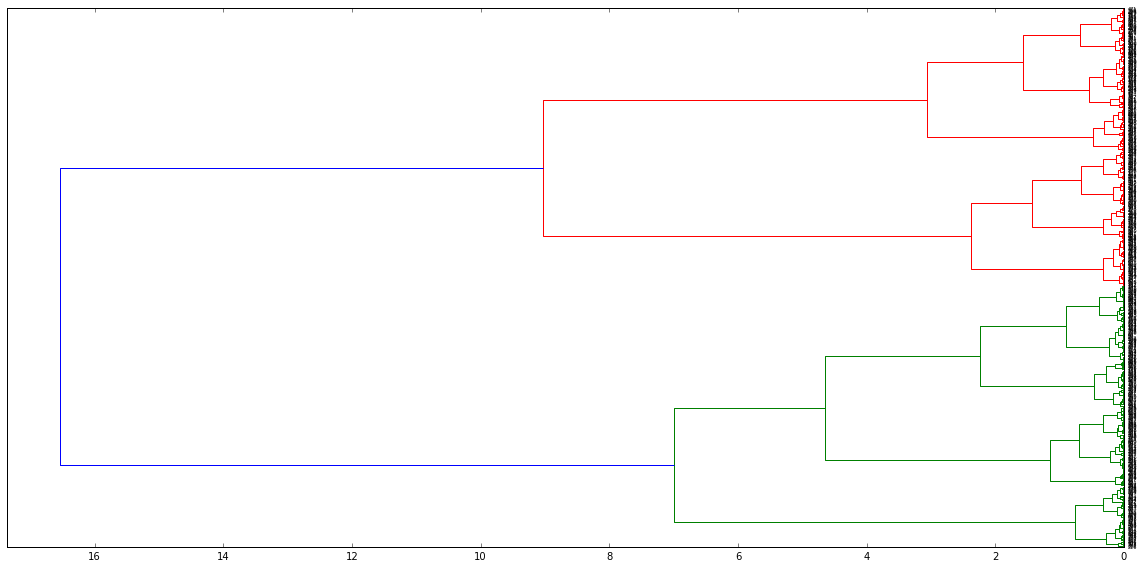

In [7]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

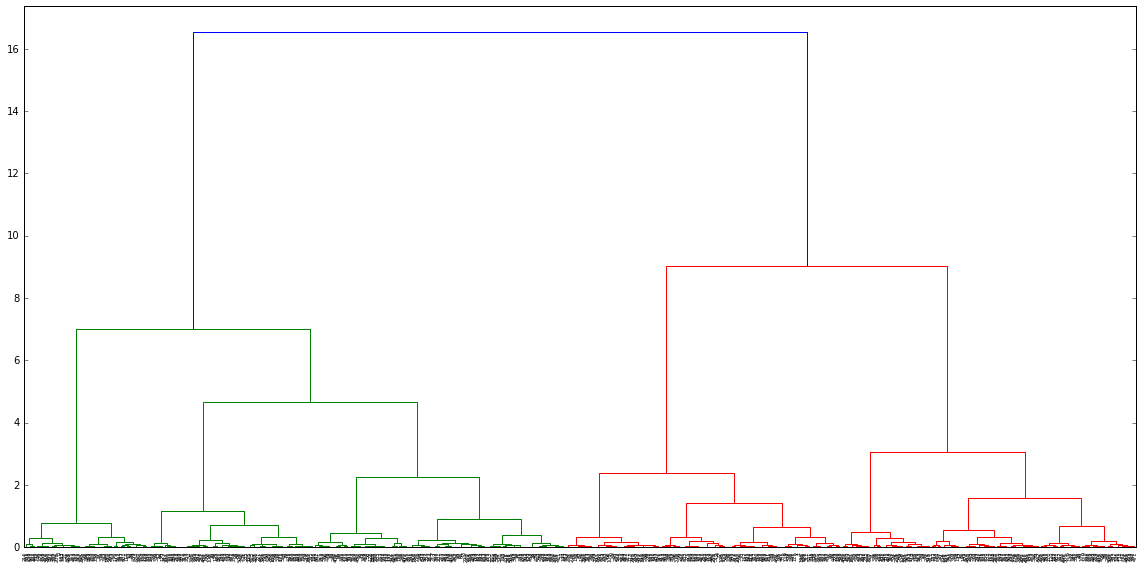

In [8]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

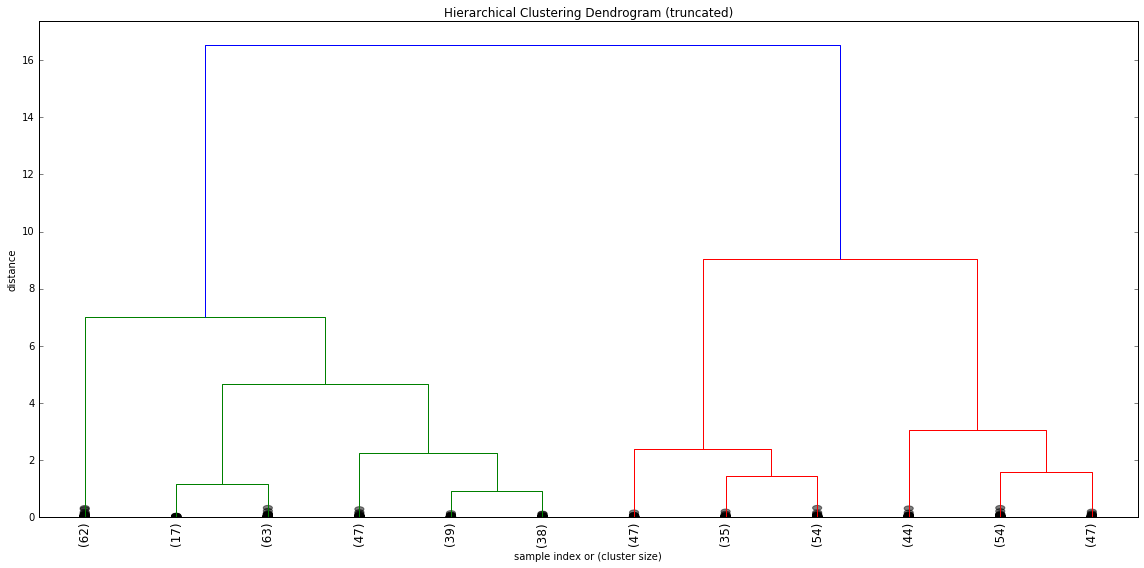

In [9]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

- p : int, optional - The p parameter for truncate_mode

- runcate_mode : str, optional - The dendrogram can be hard to read when the original observation matrix from which the linkage is derived is large. Truncation is used to condense the dendrogram. There are several modes:
    - None: No truncation is performed (default). Note: 'none' is an alias for None that’s kept for backward compatibility.
    - 'lastp': The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [ ]:
# References

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
- https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
- https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_agglomerative_clustering_metrics.py